In [115]:
#ライブラリのインポート
from tensorflow.python.keras.datasets import mnist
import matplotlib.pyplot as plt

In [116]:
#MNISTデータのインポート
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [117]:
# インポートしたデータの形を確認
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


ラベル 5


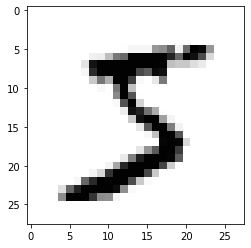

In [118]:
# MNISTデータの表示(一つのみ)
print("ラベル", y_train[0])
plt.imshow(x_train[0].reshape(28, 28), cmap='Greys')
plt.show()

In [119]:
#内容確認
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [120]:
#スケール変換
x_train = x_train.reshape(60000, 784)
x_train = x_train/255.
x_test = x_test.reshape(10000, 784)
x_test = x_test/255.

In [121]:
#ベクトル変換
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [122]:
#モデルの準備
from tensorflow.python.keras.models import Sequential

model = Sequential()

In [123]:
#中間層の追加
from tensorflow.python.keras.layers import Dense

model.add(
    Dense(
        units=64, 
        input_shape=(784,),
        activation='relu'
    )
)

In [124]:
#出力層の追加
model.add(
    Dense(
        units=10, 
        activation='softmax'
    )
)

In [125]:
#学習
from tensorflow.python.keras.callbacks import TensorBoard

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_adam = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_split=0.2,
)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3315 - accuracy: 0.9062 - val_loss: 0.1869 - val_accuracy: 0.9465
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1589 - accuracy: 0.9548 - val_loss: 0.1363 - val_accuracy: 0.9607
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1140 - accuracy: 0.9669 - val_loss: 0.1166 - val_accuracy: 0.9665
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0883 - accuracy: 0.9736 - val_loss: 0.1052 - val_accuracy: 0.9682
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9785 - val_loss: 0.0945 - val_accuracy: 0.9717
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0602 - accuracy: 0.9817 - val_loss: 0.0993 - val_accuracy: 0.9699
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0507 - accuracy: 0.9855 - val_loss: 0.0920 - val_accuracy:

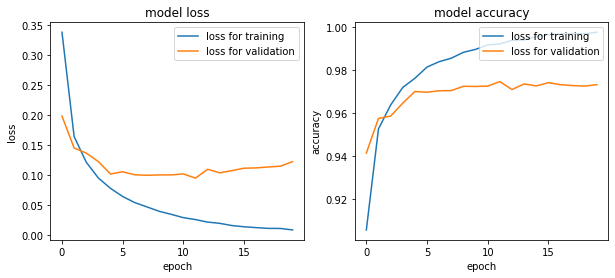

In [87]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['accuracy'],label="loss for training")
    axR.plot(fit.history['val_accuracy'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

plot_history_loss(history_adam)
plot_history_acc(history_adam)

In [88]:
loss,acc = model.evaluate(x_test, y_test, batch_size=128)
print(loss)
print(acc)

79/79 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9719
0.11693909764289856
0.9718999862670898


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
model_path = '/content/drive/My Drive/ensyu3/model_mnist'
model_json_str = model.to_json()

open(model_path + '.json', 'w').write(model_json_str)
model.save_weights(model_path + '.h5');

In [134]:
from PIL import Image
import numpy as np
import tensorflow as tf 
from keras.models import model_from_json

# 画像を読み込む
img = Image.open( "/content/drive/My Drive/ensyu3/digit/six.png" )
img = img.convert('L')
img = np.asarray(img)
img = 255 - img
img = img / 255
img_expand = img.reshape(1, 784)

#モデルの読み込み
model_arc_str = open("/content/drive/My Drive/ensyu3/model_mnist.json").read()
model = tf.keras.models.model_from_json(model_arc_str)

# モデルの重みを得る
model.load_weights("/content/drive/My Drive/ensyu3/model_mnist.h5")

predictions_single = model.predict(img_expand)
print(predictions_single)
print(predictions_single[0].argmax())

[[7.1493228e-11 3.2322443e-08 3.7925796e-09 2.1783836e-07 3.8513346e-07
  1.3716912e-05 9.9998212e-01 1.8533790e-13 3.5123614e-06 1.1116542e-08]]
6
